<a href="https://colab.research.google.com/github/Rusii123/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project_by_Raushan_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# First of all, let's **Import** the required ***libraries*** and ***modules*** 📚 ✍

In [1]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

## **Let's mount our Drive to get the xls file , and further provide its path to get it stored in an identifier so that data stored in it can be viewed and extracted as per need .**

In [2]:
#importing excel file from our google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#storing the data and reading it
data_path = '/content/drive/MyDrive/AlmaBetter/Projects/Capstone Projects/ML Capstone Projects/Supervised Learning Capstone Projects/Classification Projects/Credit Card  Default Prediction /default of credit card clients.xls'

In [4]:
df = pd.read_excel(data_path,header=1)

In [5]:
pd.__version__


'1.3.5'

In [6]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# ***Dataset Information and Summary ✅ ➿ ⏬***

In [7]:
# Viewing first 5 rows of dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
# Viewing last 5 rows of dataset
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [9]:
# Getting all the features of dataset
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
# Let's view some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [11]:
# Checking out the unique values
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [12]:
#Looking for the description of the dataset to get insights of the data
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Insights:** Tha dataset has 30000 observations and 25 features.

*   default payment next month is our target variable




# **Description of Features/columns from dataset documentation ✅ ⏬**

Breakdown of Our Features:

We have records of 30000 customers. Below are the description of all features we have.

*  ID: ID of each client

*  LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

*  SEX: Gender (1 = male, 2 = female)

*  EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

*  MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

*  AGE: Age in years

Scale for PAY_0 to PAY_6 :

(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

*  PAY_0: Repayment status in September, 2005 (scale same as above)

*  PAY_2: Repayment status in August, 2005 (scale same as above)

*  PAY_3: Repayment status in July, 2005 (scale same as above)

*  PAY_4: Repayment status in June, 2005 (scale same as above)

*  PAY_5: Repayment status in May, 2005 (scale same as above)

*  PAY_6: Repayment status in April, 2005 (scale same as above)

*  BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

*  BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

*  BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

*  BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

*  BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

*  BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

*  PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

*  PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

*  PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

*  PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

*  PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

*  PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

*  default.payment.next.month: Default payment (1=yes, 0=no)

NOTE:-

What do 0 and -2 mean in PAY_X columns?

From dataset documentation:

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above). Notice code 0 and 2 are in the PAY_X columns but are not included in the data description. Also by doing the value_counts, it shows 0 is the most frequent observation.

-2: No consumption;
-1: Paid in full;
-0: The use of revolving credit, meaning the payment wasn't due, which makes sense that most customers were using the revolving credit.

In our dataset we got customer credit card transaction history for the past 6 month , on basis of which we have to predict if cutomer will default or not.



# **Preprocessing the dataset alongwith Data cleaning to get rid of unwanted data and outliers ✅ ♟ ✂ ⚔ ⏬**

Why do we need to handle missing values?

*  The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values and that's why we check missing values first

In [13]:
# Checking out the presence of any missing/null values in distinct features 
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


Why is it important to remove duplicate records from my data?

*  "Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.

In [14]:
# Check duplicate values
len(df[df.duplicated()])

0

**Insights:** There are no duplicate and null values present in our dataset

In [15]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [16]:
df['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

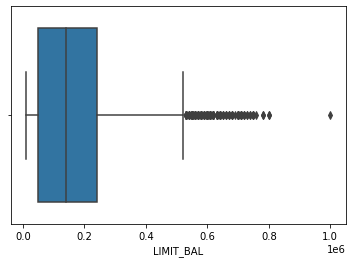

In [17]:

sns.boxplot(df['LIMIT_BAL'])

In [18]:
#Removing Outliers in Limit Ball column
Q1 = np.percentile(df['LIMIT_BAL'],25)
Q2 = np.percentile(df['LIMIT_BAL'],50)
Q3 = np.percentile(df['LIMIT_BAL'],75)
IQR =  Q3 - Q1
a=Q1-(1.5*IQR)
b=Q3+(1.5*IQR)
df=df[(df.LIMIT_BAL<b) & (df.LIMIT_BAL>a)]


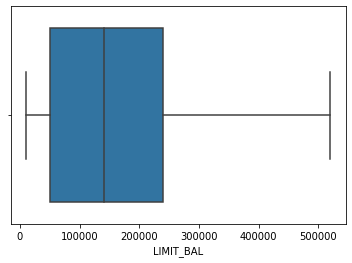

In [19]:
sns.boxplot(df['LIMIT_BAL'])

In [20]:
# Limit balance description
df['LIMIT_BAL'].describe()

count     29833.000000
mean     164963.284953
std      125529.099652
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      520000.000000
Name: LIMIT_BAL, dtype: float64

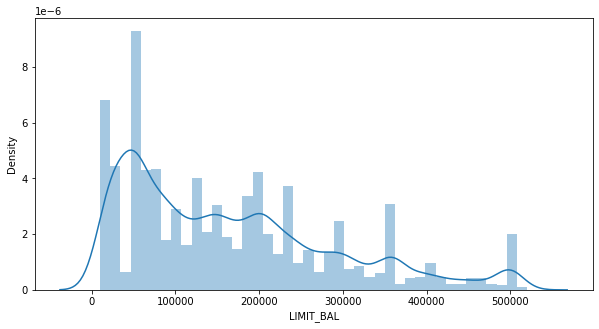

In [21]:
# Plotting distribution plot of Limit Bal.
plt.figure(figsize = (10,5))
sns.distplot(df['LIMIT_BAL'], kde = True)

**Conclusion ⛓ ✅ ✈** The Maximum amount of given credit in New Taiwan dollars(NT-💲) is near about 50,000 followed by 30,000 and 20,000 .

# ***Exploratory Data Analysis***

## **Dependent Variable ♈** 

***Analysis of Dependent Variable : default payment next month ⬇***

What is a dependent variable in data analysis?

A dependent variable is a variable whose value will change depending on the value of another variable. 

What does 'default.payment.next.month' mean?

Is it a predictor or actual data that was collected in the next month - Oct. 2005? According to the reply from the dataset contributor, it seems this is the actual data collected in the next month. "Y: client's behavior; Y=0 then not default, Y=1 then default". This information could be used to test the accuracy of the model that will be built.

In [22]:
# Change the name of target variable
df.rename(columns={'default payment next month':'default_payment_next_month'},inplace=True)

In [23]:
# Replace target variable observation 
default_payment = df.replace({'default_payment_next_month': {0 : 'no', 1 : 'yes'}},inplace = True)

In [24]:
# Number of target variable
df['default_payment_next_month'].value_counts()

no     23216
yes     6617
Name: default_payment_next_month, dtype: int64

In [25]:
# Customers who has default payment in next  month
df['default_payment_next_month'].value_counts(normalize=True)

no     0.778199
yes    0.221801
Name: default_payment_next_month, dtype: float64

Here 0 is not default and 1 is default.

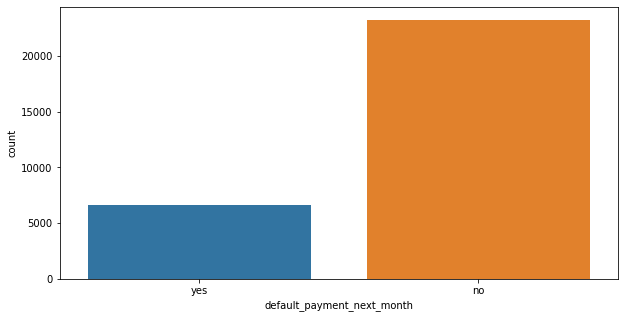

In [26]:
# Plot the graph of defaulter and non defaulter
plt.figure(figsize=(10,5))
sns.countplot(x = 'default_payment_next_month', data = df)

From the above data analysis we can say that

*  0 - Not Default - No
*  1 - Default - Yes
*  Defaulters are less than the Non Defaulters in the given dataset.
*  On getting the proportion of customers who had default payment in the next
   month, we observed that about 22% customers had default payment next month

## **Independent Variable ♈** 

**Analysis of Independent Variable 🔽**

**Categorical Features**

We have few categorical features in our dataset that are

*  sex
*  education
*  marraige
*  age

Categorical variables are qualitative data in which the values are assigned to a set of distinct groups or categories. These groups may consist of alphabetic (e.g., male, female) or numeric labels (e.g., male = 0, female = 1) that do not contain mathematical information beyond the frequency counts related to group membership.

Let'Check how they are related with out target class.

SEX

*  1 - Male
*  2 - Female

# **Age**

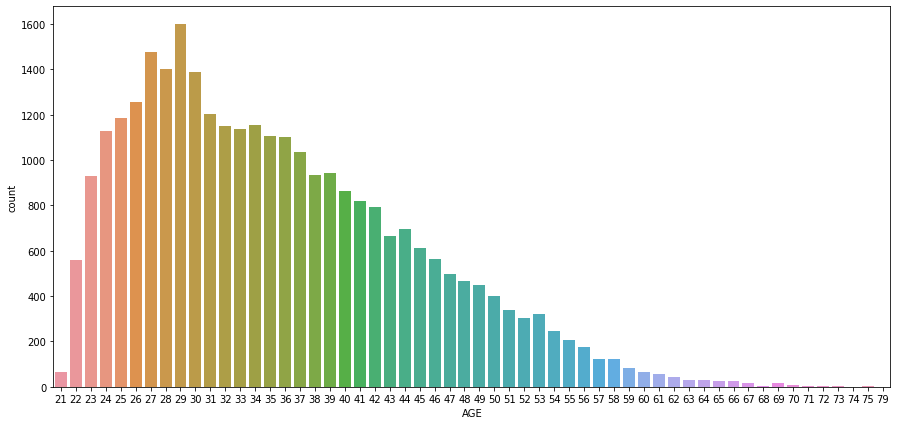

In [27]:
# Plot the graph of number of ages of people with credit card.
plt.figure(figsize=(15,7))
sns.countplot(x = 'AGE', data = df)

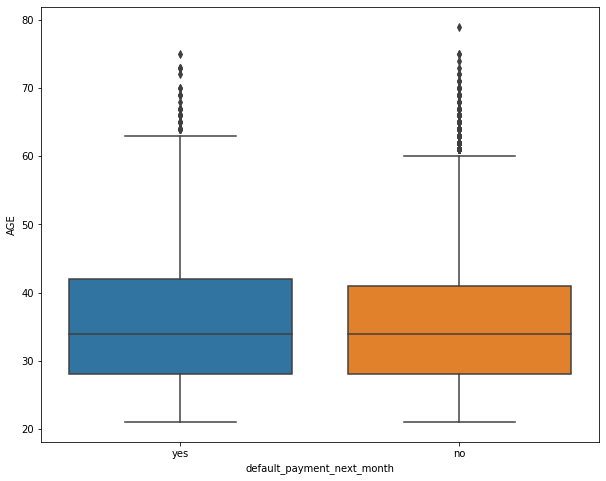

In [28]:
# Plot to check the data distribution
plt.figure(figsize=(10,8))
sns.boxplot(x = 'default_payment_next_month', y = 'AGE', data = df)

In [29]:
#check the mean of the age group rescpective to the default_payment_next_month
df.groupby('default_payment_next_month')['AGE'].mean()

default_payment_next_month
no     35.392919
yes    35.713314
Name: AGE, dtype: float64

***Conclusion ⛓ ✅ ✈*** From above plot we can see that people from age 24 to 36 uses more credit card. Above 60 years of age people rarely use credit card.

# **Education**

In [30]:
# Count the education variable in dataset
df['EDUCATION'].value_counts()

2    13976
1    10493
3     4900
5      278
4      122
6       50
0       14
Name: EDUCATION, dtype: int64

Here, In this 'EDUCATION' column, we have noticed that 5 and 6 are both recorded as 'unknown' and there is 0 which isn't explained in the dataset description. Since the amounts are so small, let's combine 0,4,5,6 to 0 which means"other'.

In [31]:
# Now combine 0,4,5 and 6 to 0 which is 'others' category
df['EDUCATION'] = df['EDUCATION'].replace({4:0,5:0,6:0})
df['EDUCATION'].value_counts()

2    13976
1    10493
3     4900
0      464
Name: EDUCATION, dtype: int64

**Now we have ✈ 1 = graduate school; 2 = university; 3 = high school; 0 = others ✅ ⏬**

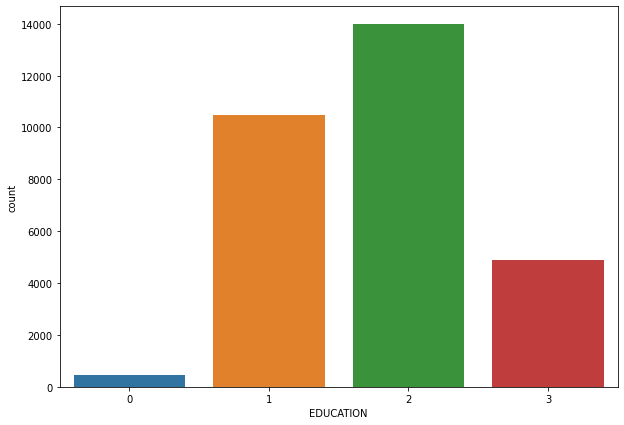

In [32]:
# 1=graduate school, 2=university, 3=high school, 0=others

# Plotting the count plot
plt.figure(figsize=(10,7))
sns.countplot(x = 'EDUCATION', data = df)

**Conclusion ⛓ ✅ ✈** On the basis of above analysis and visualization, we can conclude that most number of credit card holders are university students.

# **Marriage**

In [33]:
# Count the variables of marriage
df['MARRIAGE'].value_counts()

2    15879
1    13577
3      323
0       54
Name: MARRIAGE, dtype: int64

**Now Since, there are only 54 counts in 0 followed by 323 counts in 3 which is comparatively very small, so we will combine 0 and 3 in other category.**

In [34]:
# Combine 0 and 3
df['MARRIAGE'] = df['MARRIAGE'].replace({0:3})
df['MARRIAGE'].value_counts()

2    15879
1    13577
3      377
Name: MARRIAGE, dtype: int64

**Now we have ✅ ✈ ⏬**
*   **1 = married**
*   **2 = single**
*   **3 = others** 

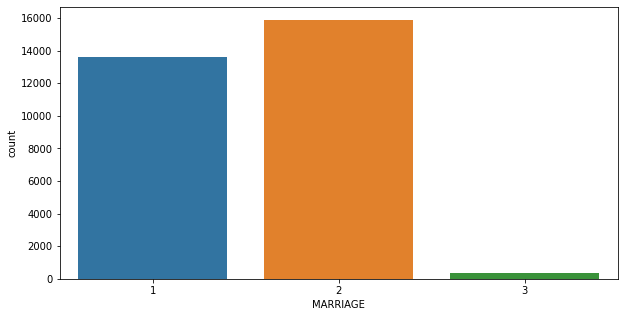

In [35]:
# Plot to view data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', data = df)

**Conclusion ⛓ ✅ ✈** From above plot we can see that most number of credit card are hold by people whose marriage status is single.

# **Sex**



*   1: Male
*   2: Female



In [36]:
# Count of variables in dataset.
df['SEX'].value_counts()

2    18020
1    11813
Name: SEX, dtype: int64

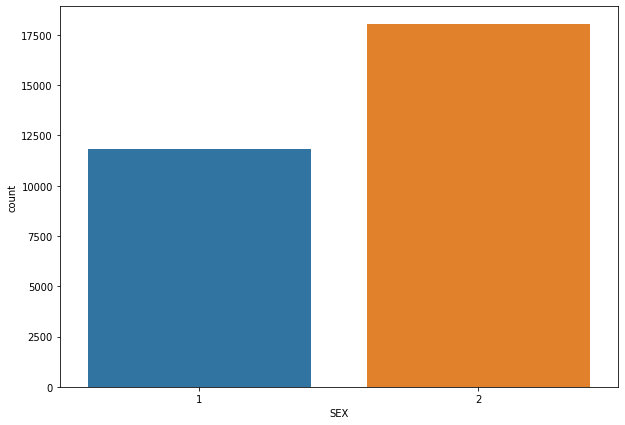

In [37]:
# Plotting the graph
plt.figure(figsize=(10,7))
sns.countplot(x = 'SEX', data = df)

**Conclusion ⛓ ✅ ✈** From above plot we can conclude that number of female credit card holder are more than male.

#**Renaming columns**

In [38]:
# Rename the column for smooth process
df.rename(columns={'PAY_0':'PAY_SEP','PAY_2':'PAY_AUG','PAY_3':'PAY_JULY','PAY_4':'PAY_JUNE','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace = True)
df.rename(columns={'BILL_AMT1':'BILL_SEP','BILL_AMT2':'BILL_AUG','BILL_AMT3':'BILL_JULY','BILL_AMT4':'BILL_JUNE','BILL_AMT5':'BILL_MAY','BILL_AMT6':'BILL_APR'},inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEP','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JULY','PAY_AMT4':'PAY_AMT_JUNE','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'}, inplace = True)

In [39]:
# check the information summary of dataset after renaming the column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29833 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29833 non-null  int64 
 1   LIMIT_BAL                   29833 non-null  int64 
 2   SEX                         29833 non-null  int64 
 3   EDUCATION                   29833 non-null  int64 
 4   MARRIAGE                    29833 non-null  int64 
 5   AGE                         29833 non-null  int64 
 6   PAY_SEP                     29833 non-null  int64 
 7   PAY_AUG                     29833 non-null  int64 
 8   PAY_JULY                    29833 non-null  int64 
 9   PAY_JUNE                    29833 non-null  int64 
 10  PAY_MAY                     29833 non-null  int64 
 11  PAY_APR                     29833 non-null  int64 
 12  BILL_SEP                    29833 non-null  int64 
 13  BILL_AUG                    29833 non-null  in

In [40]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JULY,PAY_JUNE,...,BILL_JUNE,BILL_MAY,BILL_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,yes
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,yes
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,no
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,no
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,no


### **Total Bill Amount ✅ ➿ ⏬**

***sns pair plot 📊 💹***

*   Pair plot: This function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column.



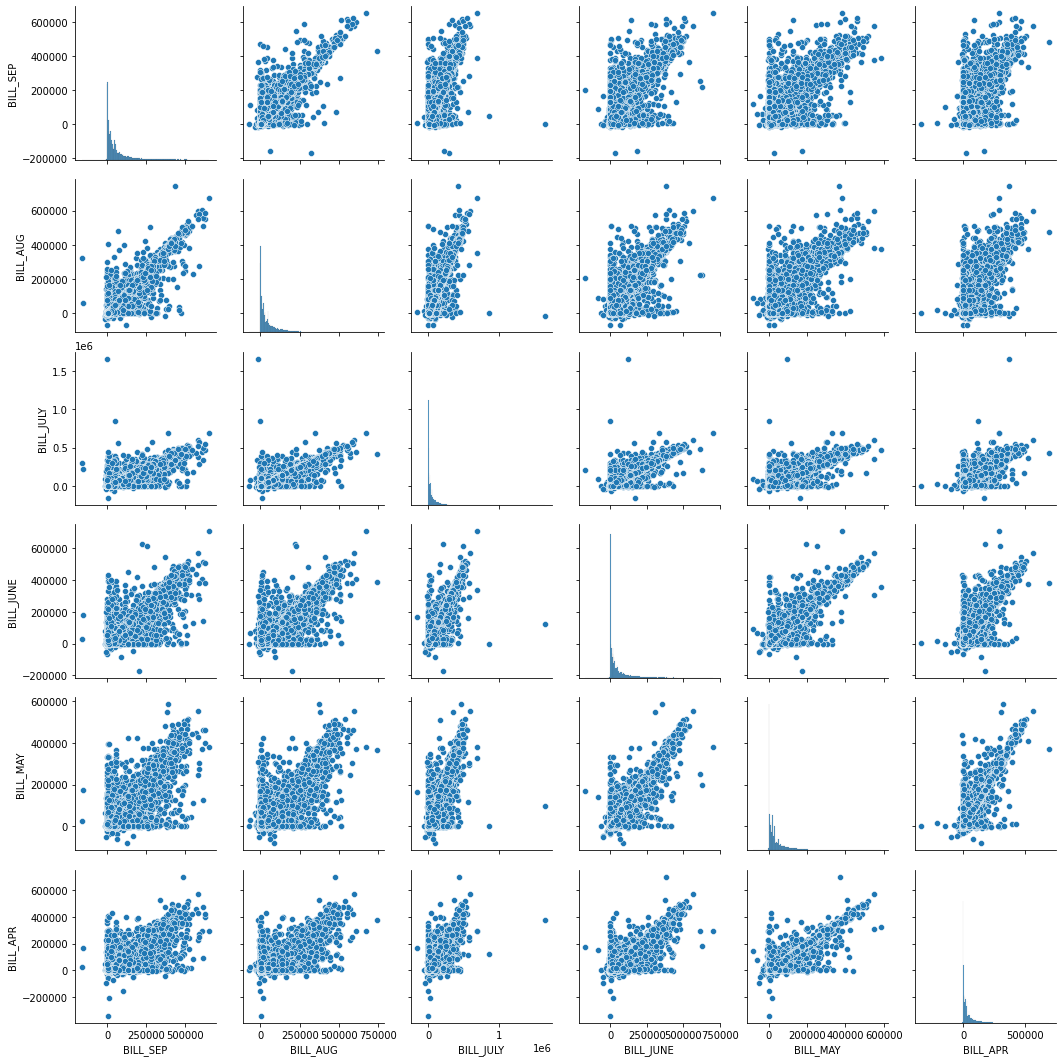

In [41]:
# Creating a single variable for the bill amount and further plotting the pairplot 
total_bill_amt = df[['BILL_SEP','BILL_AUG','BILL_JULY','BILL_JUNE','BILL_MAY','BILL_APR']]
sns.pairplot(data = total_bill_amt)

### **Previous Payment Amount ✅ ➿ ⏬**

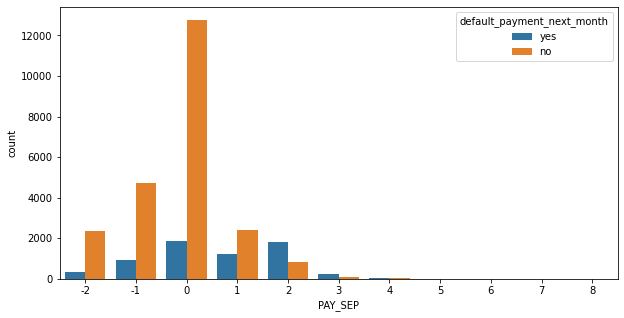

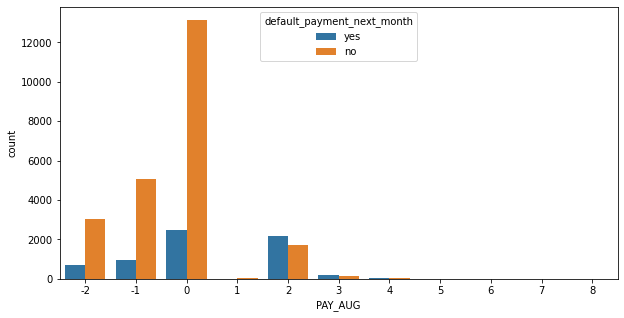

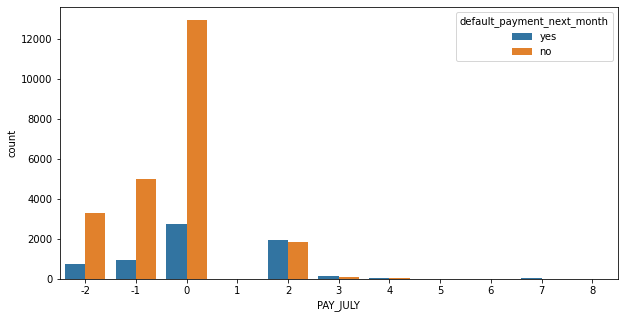

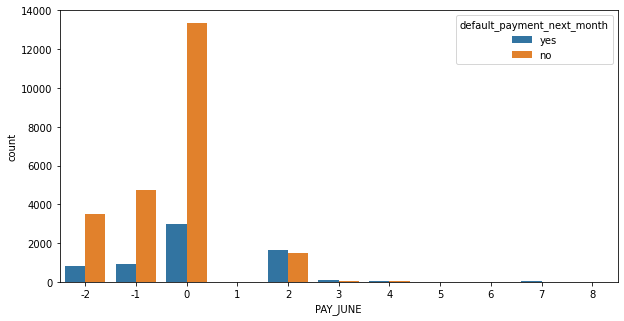

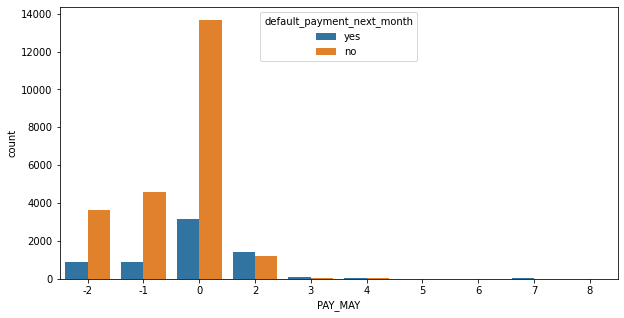

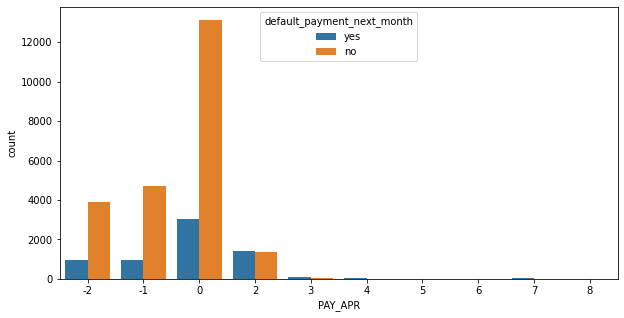

In [42]:
#plotting the count plot for Previous payment
previous_payment = ['PAY_SEP','PAY_AUG','PAY_JULY','PAY_JUNE','PAY_MAY','PAY_APR']
for col in previous_payment:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default_payment_next_month', data = df)

### **Paid Amount ✅ ➿ ⏬**

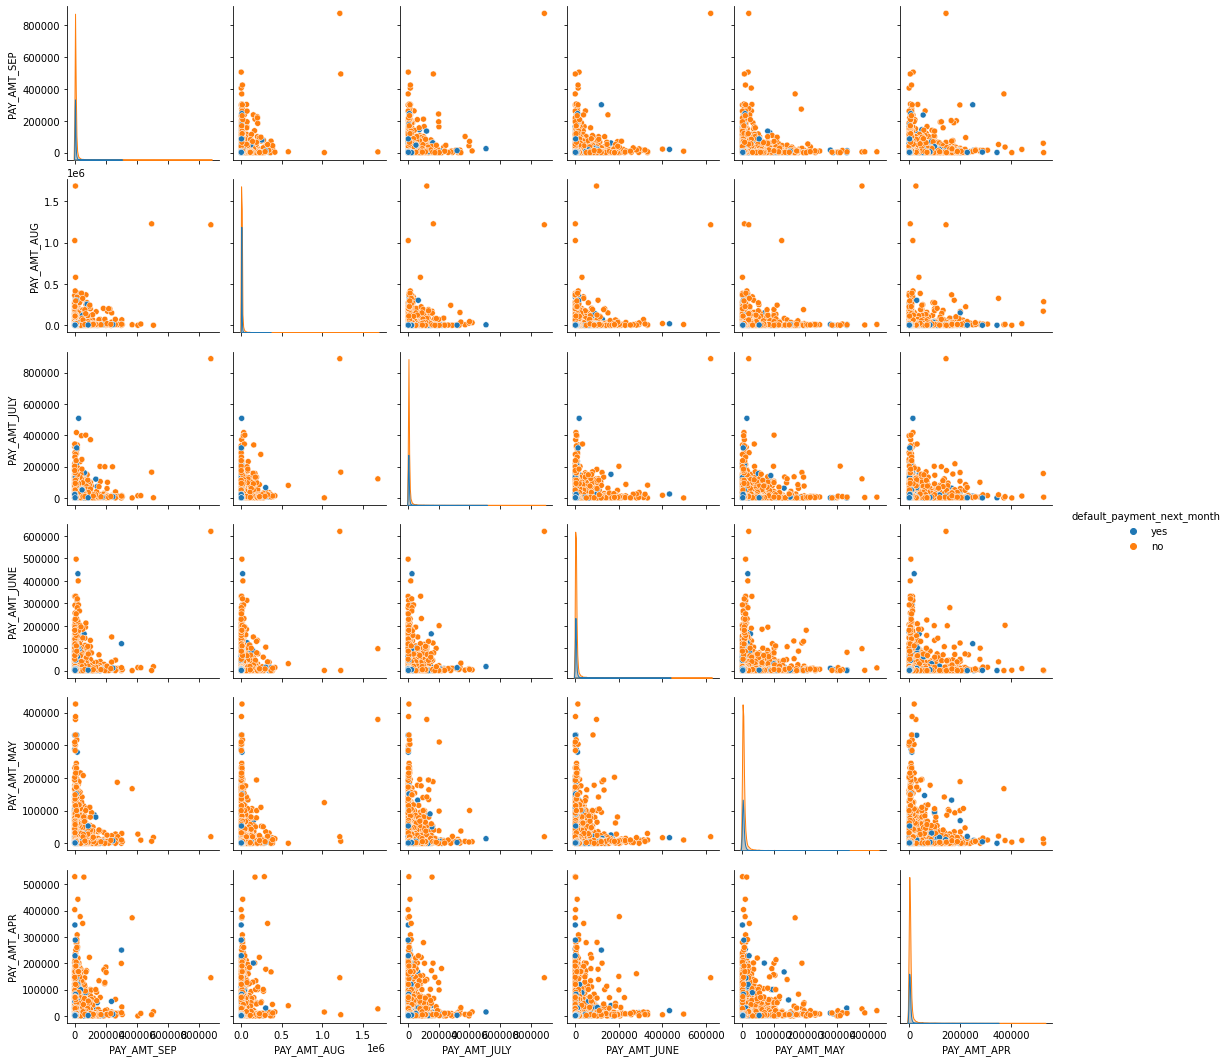

In [43]:
# Create a single variable and plot pairplot
paid_amt = df[['PAY_AMT_SEP','PAY_AMT_AUG','PAY_AMT_JULY','PAY_AMT_JUNE','PAY_AMT_MAY','PAY_AMT_APR','default_payment_next_month']]
sns.pairplot(data = paid_amt, hue = 'default_payment_next_month')

# **Bivariate Analysis**

What is bivariate analysis ❓

*  Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association

### **Sex and default_payment_next_month**

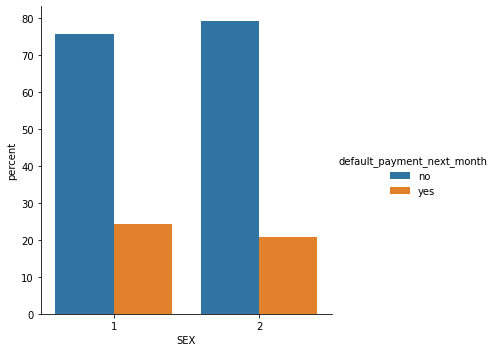

In [44]:
# Plot to visualize the data distribution between gender and default payment
x,y = 'SEX', 'default_payment_next_month'
(df.groupby(x)[y].value_counts(normalize= True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x, y='percent',hue = y,kind='bar'))

**Conclusion ⛓ ✅ ✈** It is evident from the above plot that  Males have more default payment as compared to Females.

### **Education and default_payment_next_month**

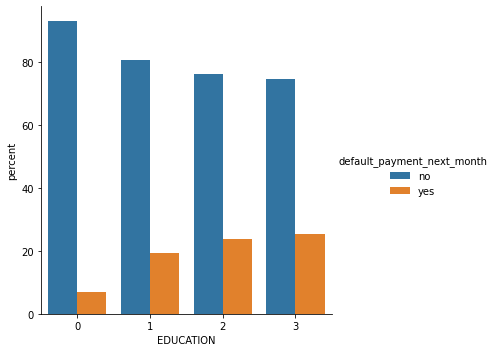

In [45]:
# Plot to visualize the data distribution between education and default payment
x,y = 'EDUCATION', 'default_payment_next_month'
(df.groupby(x)[y].value_counts(normalize= True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x, y='percent',hue = y,kind='bar'))

**Conclusion ⛓ ✅ ✈** From the above plot, we can see that high schools people has more default payment than others.

### **Marriage and default_payment_next_month**

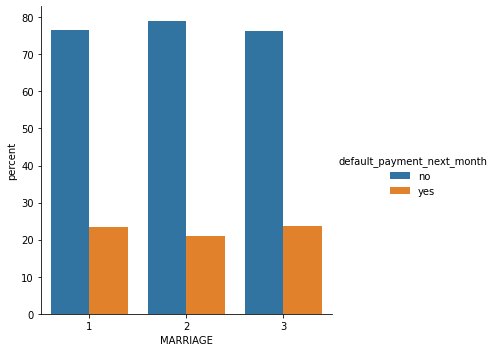

In [46]:
# Plot to visualize the data distribution between marriage and default payment
x,y = 'MARRIAGE', 'default_payment_next_month'
(df.groupby(x)[y].value_counts(normalize= True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x, y='percent',hue = y,kind='bar'))

**Conclusion ⛓ ✅ ✈** High Default payment in others category are more as compared to married and single.

# **Correlation Matrix**

## ***Before we proceed towards our milestones, Let's also check how these Columns are co-related to one another . ➿ ⏬***

In [47]:
#Obtaining the correlation table
corr_df = df.corr()
corr_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JULY,PAY_JUNE,...,BILL_JULY,BILL_JUNE,BILL_MAY,BILL_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APR
ID,1.000000,0.026021,0.018981,0.012769,-0.028509,0.018487,-0.030228,-0.010552,-0.018091,-0.002034,...,0.023947,0.040475,0.015795,0.016664,0.008799,0.008896,0.042947,0.005528,0.000877,0.001998
LIMIT_BAL,0.026021,1.000000,0.027927,-0.247553,-0.113253,0.141665,-0.276295,-0.302979,-0.292418,-0.273157,...,0.267146,0.277944,0.279822,0.272889,0.191468,0.176195,0.205008,0.199211,0.206338,0.213436
SEX,0.018981,0.027927,1.000000,0.007423,-0.029284,-0.090376,-0.058245,-0.071120,-0.066138,-0.060204,...,-0.024093,-0.022063,-0.016632,-0.016126,0.000024,-0.001624,-0.010326,-0.000509,-0.001820,-0.002987
EDUCATION,0.012769,-0.247553,0.007423,1.000000,-0.132763,0.181196,0.131580,0.155121,0.148665,0.140244,...,-0.009380,-0.018452,-0.019087,-0.012542,-0.043709,-0.040931,-0.063164,-0.043638,-0.050176,-0.056049
MARRIAGE,-0.028509,-0.113253,-0.029284,-0.132763,1.000000,-0.411714,0.018682,0.023794,0.032559,0.032009,...,-0.027931,-0.026057,-0.027842,-0.023648,-0.005021,-0.009621,-0.002915,-0.013128,-0.004076,-0.008315
AGE,0.018487,0.141665,-0.090376,0.181196,-0.411714,1.000000,-0.038994,-0.050053,-0.053055,-0.049550,...,0.049537,0.047068,0.045146,0.043024,0.025508,0.021245,0.024717,0.019854,0.022124,0.018434
PAY_SEP,-0.030228,-0.276295,-0.058245,0.131580,0.018682,-0.038994,1.000000,0.671602,0.573595,0.538432,...,0.181756,0.181341,0.182826,0.179742,-0.080783,-0.070855,-0.076344,-0.064928,-0.060120,-0.059178
PAY_AUG,-0.010552,-0.302979,-0.071120,0.155121,0.023794,-0.050053,0.671602,1.000000,0.766106,0.661660,...,0.226698,0.225221,0.224464,0.222719,-0.081164,-0.059206,-0.060103,-0.047032,-0.036602,-0.036394
PAY_JULY,-0.018091,-0.292418,-0.066138,0.148665,0.032559,-0.053055,0.573595,0.766106,1.000000,0.777198,...,0.230204,0.230338,0.228547,0.225888,0.000293,-0.066784,-0.059122,-0.047492,-0.036777,-0.036998
PAY_JUNE,-0.002034,-0.273157,-0.060204,0.140244,0.032009,-0.049550,0.538432,0.661660,0.777198,1.000000,...,0.249410,0.251058,0.248411,0.244810,-0.008994,-0.002075,-0.072093,-0.043355,-0.033753,-0.026495


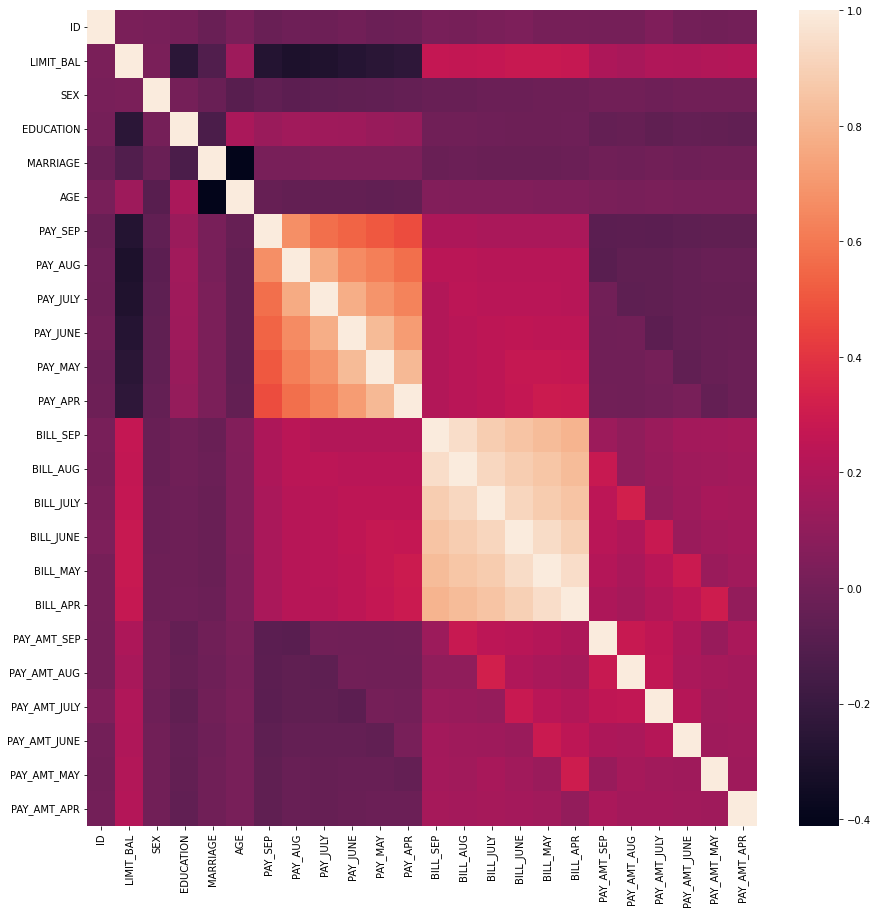

In [48]:
#Visualizing the above obtained data frame through heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr_df)

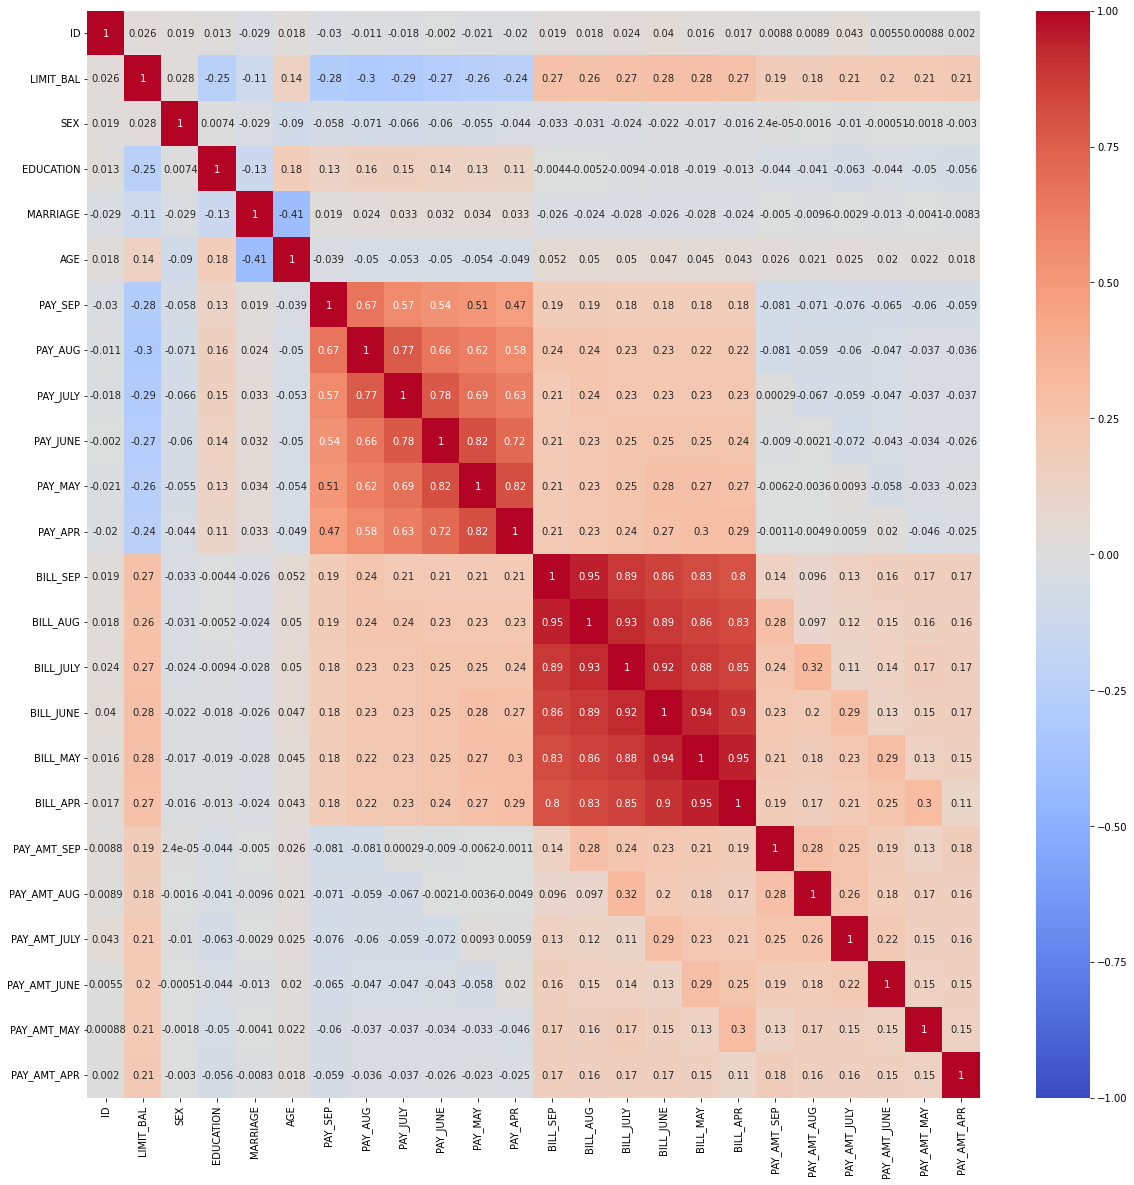

In [49]:
#Above visualization in more advanced form
plt.figure(figsize=(20,20))
sns.heatmap(corr_df,vmin=-1,cmap='coolwarm',annot=True)

**Conclusion ⛓ ✅ ✈** We can see in above plot that some variable like age are negatively correlated, but we can't blindly remove this feature as it could be important feature for prediction, whereas ID is not important and it has no role in prediction so we will remove it in further process.

# SMOTE(Synthetic Minority Oversampling Technique): 

*  Oversampling is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

*   In our dataset we have high imbalanced data distribution in target variable, this happens generally when observation in one of the class are much higher.
*   As machine learning algorithm tends to increase accuracy by reducing error so they do not consider class distribution.
*   ML techniques such as Decision Trees and Logistic Regression is biased towards majority class and tend to ignore minority class.

In [50]:
# Create a dataframe copy
credit_data_df_copy = df.copy()

In [51]:
credit_data_df_copy = credit_data_df_copy.replace({'SEX': {'male' : 1, 'female' : 2}, 'EDUCATION' : {'graduate school' : 1, 'university' : 2, 'high school' : 3, 'others' : 4,'others':0},'MARRIAGE' :{'married' : 1 , 'single': 2, 'others': 3},'default_payment_next_month':{'no' : 0, 'yes' : 1}})

In [52]:
# Apply smote to balance the dataset
smote = SMOTE()

In [53]:
# Fit the target and predictor variable
x_smote,y_smote = smote.fit_resample(credit_data_df_copy.iloc[:,0:-1],credit_data_df_copy['default_payment_next_month'])
print('Original dataset observation',len(credit_data_df_copy))
print('Resampled dataset observation',len(y_smote))

Original dataset observation 29833
Resampled dataset observation 46432


In [54]:
columns = list(credit_data_df_copy.columns)
columns.pop()

'default_payment_next_month'

In [55]:
# Create a variable name for balanced dataframe
balanced_credit_data_df = pd.DataFrame(x_smote, columns=columns)
balanced_credit_data_df['default_payment_next_month'] = y_smote

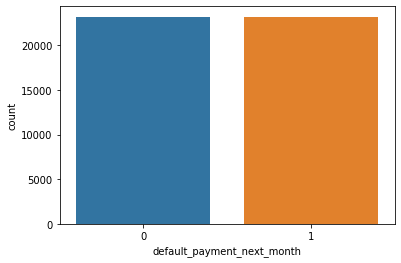

In [56]:
# Count plot after applying smote
sns.countplot('default_payment_next_month', data = balanced_credit_data_df)

In [57]:
balanced_credit_data_df[balanced_credit_data_df['default_payment_next_month']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JULY,PAY_JUNE,...,BILL_JUNE,BILL_MAY,BILL_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
12,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
15,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
20,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46427,1846,170000,1,1,1,35,-1,0,0,0,...,3228,5204,4024,1818,2610,1290,3331,177,2615,1
46428,16295,72953,2,2,1,37,0,0,0,0,...,34486,27862,26617,2955,1932,4644,836,295,1711,1
46429,5259,210489,2,1,1,25,1,3,2,2,...,179447,180567,179493,2472,8573,3304,6324,3208,6145,1
46430,28461,30000,1,2,1,32,0,0,0,0,...,21394,21852,22202,1803,2984,909,1803,1078,1393,1


# Feature Engineering

In [58]:
# create a variable and copy the balanced dataset
credit_df_copy = balanced_credit_data_df.copy()

In [59]:
# Assign the sum of payment value in one
credit_df_copy['total_pay_value'] = credit_df_copy['PAY_SEP']+credit_df_copy['PAY_AUG']+credit_df_copy['PAY_JULY']+credit_df_copy['PAY_JUNE']+credit_df_copy['PAY_MAY']+credit_df_copy['PAY_APR']
credit_df_copy['total_pay_value']

0        -2
1         3
2         0
3         0
4        -2
         ..
46427    -1
46428     3
46429    10
46430     0
46431     8
Name: total_pay_value, Length: 46432, dtype: int64

In [60]:
# Check the correlation using mean
credit_df_copy.groupby('default_payment_next_month')['total_pay_value'].mean()

default_payment_next_month
0   -1.974070
1    1.678455
Name: total_pay_value, dtype: float64

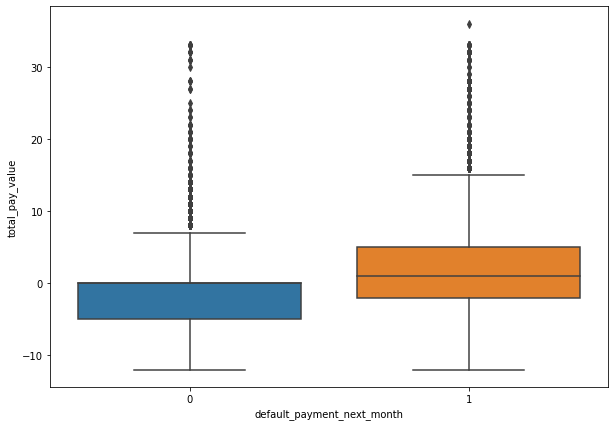

In [61]:
# View box plot
plt.figure(figsize=(10,7))
sns.boxplot(data = credit_df_copy, x = 'default_payment_next_month', y = 'total_pay_value')

In [62]:
# Create a column of amount due by summing total bill amount and subtracting it from total amount paid
credit_df_copy['amt_due'] = (credit_df_copy['BILL_SEP']+credit_df_copy['BILL_AUG']+credit_df_copy['BILL_JULY']+credit_df_copy['BILL_JUNE']+credit_df_copy['BILL_MAY']+credit_df_copy['BILL_APR']) - (credit_df_copy['total_pay_value'])

In [63]:
# Check the correlation by calculating the mean
credit_df_copy.groupby('default_payment_next_month')['amt_due'].mean()

default_payment_next_month
0    268544.678282
1    254915.794151
Name: amt_due, dtype: float64

In [64]:
#  Change the features observation to categorical
credit_df_copy.replace({'SEX': {1 : 'male', 2 : 'female'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others',0:'others'},'MARRIAGE' :{1 : 'married' , 2: 'single', 3: 'others'}},inplace = True)

In [65]:
# Final dataset
credit_df_copy.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JULY,PAY_JUNE,...,BILL_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month,total_pay_value,amt_due
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,7706
1,2,120000,female,university,single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,17074
2,3,90000,female,university,single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,101653
3,4,50000,female,university,married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,231334
4,5,50000,male,university,married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,109341


#**One Hot Encoding**
*  One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

*   In this method we convert each categorical value into a new categorical column and assign a binary value 0 or 1.

*  Here, we would perform one hot encoding on 'EDUCATION','MARRIAGE','PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'

In [66]:
# Apply one hot encoding
credit_df_copy = pd.get_dummies(credit_df_copy, columns=["MARRIAGE", "EDUCATION"])

In [67]:
# Apply one hot encoding
credit_df_copy = pd.get_dummies(credit_df_copy, columns=['PAY_SEP','PAY_AUG','PAY_JULY','PAY_JUNE','PAY_MAY','PAY_APR'], drop_first=True)

In [68]:
#Apply label encoding on sex column
credit_df_copy['SEX'] = credit_df_copy['SEX'].apply(lambda x:1 if x == 'male' else 0)

In [69]:
#credit_df_copy.drop('ID', axis='columns', inplace=True)

In [70]:
#Alternate to above shell
credit_df_copy.drop('ID',axis = 1, inplace = True)

In [71]:
# Checking out the info of dataset after applying one hot encoding
credit_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46432 entries, 0 to 46431
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   46432 non-null  int64
 1   SEX                         46432 non-null  int64
 2   AGE                         46432 non-null  int64
 3   BILL_SEP                    46432 non-null  int64
 4   BILL_AUG                    46432 non-null  int64
 5   BILL_JULY                   46432 non-null  int64
 6   BILL_JUNE                   46432 non-null  int64
 7   BILL_MAY                    46432 non-null  int64
 8   BILL_APR                    46432 non-null  int64
 9   PAY_AMT_SEP                 46432 non-null  int64
 10  PAY_AMT_AUG                 46432 non-null  int64
 11  PAY_AMT_JULY                46432 non-null  int64
 12  PAY_AMT_JUNE                46432 non-null  int64
 13  PAY_AMT_MAY                 46432 non-null  int64
 14  PAY_AM

In [72]:
credit_df_copy.head()

,LIMIT_BAL,SEX,AGE,BILL_SEP,BILL_AUG,BILL_JULY,BILL_JUNE,BILL_MAY,BILL_APR,PAY_AMT_SEP,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,0,1,0,0,0,0,0,0,0,0


#**Modeling**

### **Performance Metrics**


*  **Precision** is a good metric to use when the costs of false positive(FP) is high.

    **Precision = TP / (TP + FP)**

*  **Recall** is a good metric to use when the cost associated with false negative(FN) is high.

    **Recall = TP / (TP + FN)**

*  **F1-score** is a weighted average of precision and recall. Thus, it considers FP and FN. This metric is very useful when we have uneven class distribution, as it seeks a balance between precision and recall.

    **F1-score = 2 (precision recall) / (precision + recall)**

**Note**
*  In this classification problem there is a high cost for the bank when a default credit card is predicted as non-default which results in that no actions can be taken on it, and thus, we will give recall more importance .

# **Logistic Regression Implementation**

Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C, the power of regulation is reduced and the model increases its complexity, thus overfitting the data.

In [73]:
# creating a copy of dataset
credit_df_logistic = credit_df_copy.copy()

In [74]:
#Viewing the first 5 rows
credit_df_logistic.head()

,LIMIT_BAL,SEX,AGE,BILL_SEP,BILL_AUG,BILL_JULY,BILL_JUNE,BILL_MAY,BILL_APR,PAY_AMT_SEP,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,0,1,0,0,0,0,0,0,0,0


### **Train - Test Split**

In [75]:
#define the X and y value
X = credit_df_logistic.drop(['default_payment_next_month','total_pay_value','amt_due'],axis=1)
y = credit_df_logistic['default_payment_next_month']

In [76]:
columns = X.columns

In [77]:
# Applying the standardscalar to standardise x value
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [78]:
# Splitting out the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42, stratify=y)

### **Hyperparameter tuning using GridSearchCV**

What is GridSearchCV?

*  GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit our estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters.

In [79]:
# Set the parameter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [80]:
# Fit the parameter
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [81]:
optimized_clf_result = grid_lr_clf.best_estimator_
grid_lr_clf.best_estimator_

LogisticRegression(C=1)

In [82]:
grid_lr_clf.best_params_

{'C': 1, 'penalty': 'l2'}

In [83]:
grid_lr_clf.best_score_

0.7528715828164484

In [84]:
# Predicted probability
train_pred = optimized_clf_result.predict_proba(X_train)[:,1]
test_pred = optimized_clf_result.predict_proba(X_test)[:,1]

In [85]:
# Get the predicted classes
train_class_pred = optimized_clf_result.predict(X_train)
test_class_pred = optimized_clf_result.predict(X_test)

### **Model Evaluation**

In [86]:
# Getting the accuracy scores
train_accuracy_logistic = accuracy_score(train_class_pred,y_train)
test_accuracy_logistic = accuracy_score(test_class_pred,y_test)
print('The accuracy on train data is', train_accuracy_logistic)
print('The accuracy on test data is', test_accuracy_logistic)

The accuracy on train data is 0.753790489317712
The accuracy on test data is 0.7488800827015851


In [87]:
#print the accuracy,precission,recall,f1,roc_score 
test_accuracy_logistic = accuracy_score(test_class_pred,y_test)
test_precision_logistic = precision_score(test_class_pred,y_test)
test_recall_logistic = recall_score(test_class_pred,y_test)
test_f1_logistic = f1_score(test_class_pred,y_test)
test_roc_logistic = roc_auc_score(test_class_pred,y_test)

print('The accuracy on test data is',test_accuracy_logistic)
print('The precision on test data is',test_precision_logistic)
print('The recall on test data is',test_recall_logistic)
print('The f1 score on test data is',test_f1_logistic)
print('The roc score on test data is',test_roc_logistic)

The accuracy on test data is 0.7488800827015851
The precision on test data is 0.680565127498277
The recall on test data is 0.7882658152065456
The f1 score on test data is 0.730466944059177
The roc score on test data is 0.7536144901407898


**Conclusion ⛓ ✅ ✈ ♈**

From the above evalution we get the results as below ⏬

*  The accuracy on test data is 0.7553984825886778

*  The precision on test data is 0.6936446173800259

*  The recall on test data is 0.7913583900562297

*  The f1 on test data is 0.7392867016864806

*  The roc_score on test data is 0.7593522874903104

**Note**: We have implemented logistic regression and we get f1_sore approx 73%. As we have imbalanced dataset, F1- score is better parameter.

### **Confusion Matrix**


Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.



In [88]:
# Get the confusion matrix for train and test data
cnf_matrix_logistic = confusion_matrix(y_train, train_class_pred)
print(cnf_matrix_logistic)

[[14239  3173]
 [ 5401 12011]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

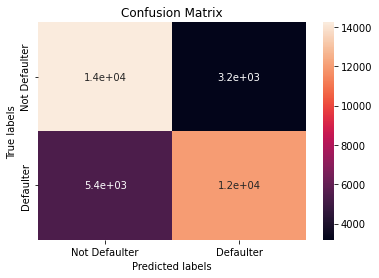

In [89]:
# Plot confusion matrix
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cnf_matrix_logistic, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Feature importance**

Feature importance refers to the techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [90]:
# Create a varaiable and assign features and importance
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf_result.coef_).ravel() })
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

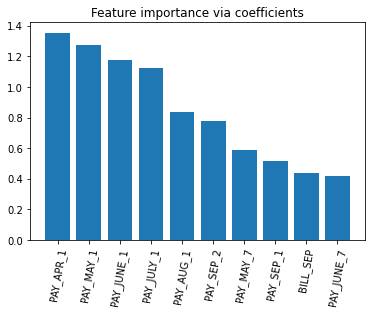

In [91]:
# Plot the important features
plt.bar(height=feature_importance['Importance'],x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title('Feature importance via coefficients')
plt.show()

**Conclusion ⛓ ✅ ✈** From above plot we can see that PAY_MAY_1, PAY_APR_1 and PAY_JUNE_1 are the most important feature that make impact on dependent variable.

### **ROC AUC Curve**


*   An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
*   True Positive Rate

*   False Positive Rate
*   AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve





In [92]:
# Assign the variable
y_pred_proba_logistic = optimized_clf_result.predict_proba(X_test)[::,1]

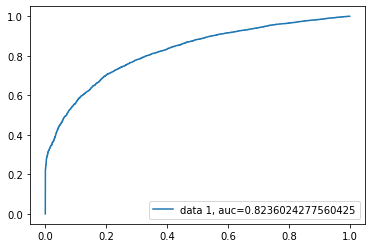

In [93]:
y_pred_proba = y_pred_proba_logistic
fpr,tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label= 'data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

# **XGBoost Implementation**


The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.fit() function.




In [94]:
# The data is stored in Dmatrix object and label is used to define our outcome variable
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test)

In [95]:
# Set the parameter for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [96]:
# Model Training
num_round = 50
start = datetime.now()
xg= xgb.train(parameters,dtrain,num_round)
stop = datetime.now()

In [97]:
# Model execution time
execution_time_xgb = stop-start
execution_time_xgb

datetime.timedelta(seconds=7, microseconds=752188)

In [98]:
# Predicting our model on train set
train_class_pred_probs = xg.predict(dtrain)

In [99]:
# Predicting our model on test set
test_class_pred_probs = xg.predict(dtest)
len(train_class_pred_probs)

34824

In [100]:
train_class_pred = []
test_class_pred = []
for i in range(0,len(train_class_pred_probs)):
  if train_class_pred_probs[i] >= 0.5:
    train_class_pred.append(1)
  else:
    train_class_pred.append(0)

for i in range(0,len(test_class_pred_probs)):
  if test_class_pred_probs[i] >= 0.5:
    test_class_pred.append(1)
  else:
    test_class_pred.append(0)

In [101]:
test_class_pred_probs[:20]

array([0.6344714 , 0.6316449 , 0.41523644, 0.34859115, 0.7616018 ,
       0.96189934, 0.324436  , 0.55284363, 0.53704613, 0.94920844,
       0.1765401 , 0.52820414, 0.29634625, 0.63753957, 0.96189934,
       0.56142634, 0.67140275, 0.34526128, 0.2980689 , 0.23815744],
      dtype=float32)

In [102]:
test_class_pred[:20]

[1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0]

In [103]:
len(y_train)

34824

In [104]:
len(train_class_pred)

34824

### **Model Evaluation**

In [105]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_pred,y_train)
test_accuracy_xgb = accuracy_score(test_class_pred,y_test)

print('The accuracy on train data is ', train_accuracy_xgb)
print('The accuracy on test data is ', test_accuracy_xgb)

The accuracy on train data is  0.7863542384562371
The accuracy on test data is  0.7756719503790489


In [106]:
# Get the accuracy, precision, recall, f1score, roc_score
test_accuracy_xgb = accuracy_score(test_class_pred,y_test)
test_precision_xgb = precision_score(test_class_pred,y_test)
test_recall_xgb = recall_score(test_class_pred,y_test)
test_f1_xgb = f1_score(test_class_pred,y_test)
test_roc_xgb = roc_auc_score(test_class_pred,y_test)

print('The accuracy on test data is', test_accuracy_xgb)
print('The precision on test data is', test_precision_xgb)
print('The recall on test data is', test_recall_xgb)
print('The f1 score on test data is', test_f1_xgb)
print('The roc score on test data is', test_roc_xgb)

The accuracy on test data is 0.7756719503790489
The precision on test data is 0.7000344589937973
The recall on test data is 0.8248071457572067
The f1 score on test data is 0.7573159366262814
The roc score on test data is 0.7821282062219137


### **Confusion Matrix**

In [107]:
# Get the confusion matrix for train and test data
cnf_matrix_xg = confusion_matrix(y_train, train_class_pred)
print(cnf_matrix_xg)

[[14986  2426]
 [ 5014 12398]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

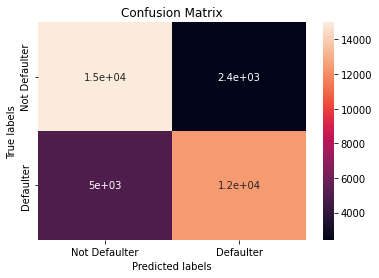

In [108]:
# Plot confusion matrix
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cnf_matrix_xg, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Hyperparameter Tuning**


*   Hyperparameters are crucial as they control the overall behaviour of a machine learning model. The ultimate goal is to find an optimal combination of hyperparameters that minimizes a predefined loss function to give better results.

*   We can leverage the maximum power of XGBoost by tuning its hyperparameters.


In [109]:
# Define the x and y value
X = credit_df_copy.drop(['default_payment_next_month','total_pay_value','amt_due'],axis=1)
y = credit_df_copy['default_payment_next_month']

In [110]:
# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

In [111]:
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}

gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=140,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective = 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27),param_grid=param_test1,scoring='accuracy',n_jobs=-1,cv=3,verbose=2)

gsearch1.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     n_estimators=140, nthread=4, seed=27,
                                     subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [112]:
 # Get the best score
 gsearch1.best_score_

0.8235699517574088

In [113]:
# Get the best estimator
optimal_xgb_result = gsearch1.best_estimator_

In [114]:
# Get the predicted class
train_class_pred = optimal_xgb_result.predict(X_train)
test_class_pred = optimal_xgb_result.predict(X_test)

In [115]:
# Get the accuracy score after hyperparameter tuning
train_accuracy_xgb_tuned = accuracy_score(train_class_pred,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_pred,y_test)

print('The accuracy score on train data after hyperparameter tuning is ', train_accuracy_xgb_tuned)
print('The accuracy score on test data after hyperparameter tuning is', test_accuracy_xgb_tuned)

The accuracy score on train data after hyperparameter tuning is  0.9098897312198484
The accuracy score on test data after hyperparameter tuning is 0.8294279807029634


In [116]:
# Get the accuracy, precision, recall, f1score, roc_score after tuning
test_accuracy_xgb_tuned = accuracy_score(test_class_pred,y_test)
test_precision_xgb_tuned = precision_score(test_class_pred,y_test)
test_recall_xgb_tuned = recall_score(test_class_pred,y_test)
test_f1_xgb_tuned = f1_score(test_class_pred,y_test)
test_roc_xgb_tuned = roc_auc_score(test_class_pred,y_test)

print('The accuracy on test data after hyperparameter tuning is ', test_accuracy_xgb_tuned)
print('The Precision on test data after hyperparameter tuning is ', test_precision_xgb_tuned)
print('The recall on test data after hyperparameter tuning is ', test_recall_xgb_tuned)
print('The f1 score on test data after hyperparameter tuning is ', test_f1_xgb_tuned)
print('The roc score on test data after hyperparameter tuning is ', test_roc_xgb_tuned)

The accuracy on test data after hyperparameter tuning is  0.8294279807029634
The Precision on test data after hyperparameter tuning is  0.7866988283942109
The recall on test data after hyperparameter tuning is  0.8602110022607385
The f1 score on test data after hyperparameter tuning is  0.8218142548596112
The roc score on test data after hyperparameter tuning is  0.831851532876401


In [117]:
# Store the values of feature in dataframe and sort them
pd.DataFrame(optimal_xgb_result.feature_importances_,index = columns, columns=['importance_xgb']).sort_values('importance_xgb', ascending=False)[:10]

,importance_xgb
PAY_AUG_1,0.144253
PAY_JULY_1,0.128085
PAY_AUG_2,0.073922
PAY_SEP_2,0.067587
PAY_JUNE_1,0.057264
PAY_MAY_1,0.048175
PAY_APR_1,0.040041
MARRIAGE_married,0.034629
SEX,0.033537
PAY_SEP_1,0.031812


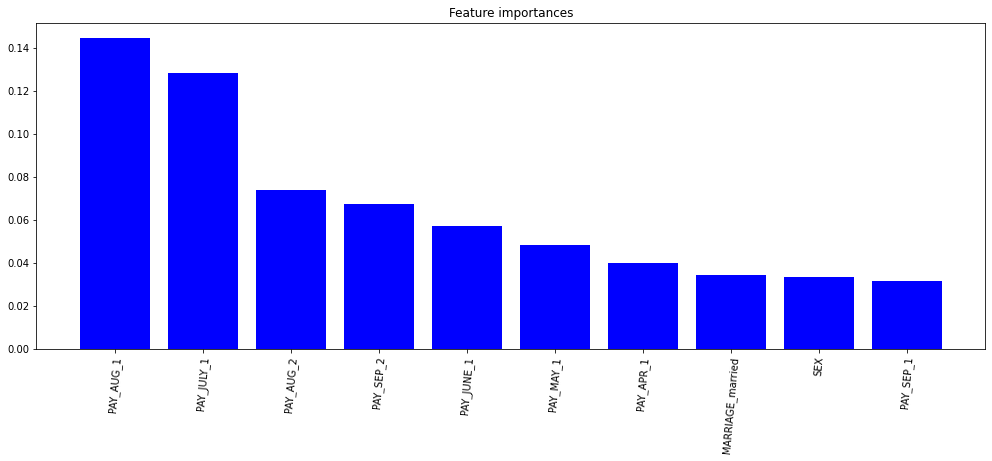

In [118]:
# Create the variable and plot the bar graph for feature importance

feature_importance_xgb = pd.DataFrame(optimal_xgb_result.feature_importances_,index = columns, columns=['importance_xgb']).sort_values('importance_xgb', ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importance_xgb.index, feature_importance_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importance_xgb.index, rotation = 85)
plt.show()

**Conclusion ⛓ ✅ ✈** From the above plot, we can say that most important feature is PAY_AUG_1 that affects the target variable.

### **ROC AUC Curve**

In [119]:
# Assign the variable
y_pred_proba_xgb = optimal_xgb_result.predict_proba(X_test)[::,1]

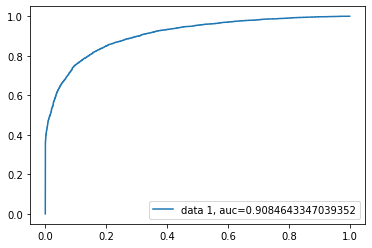

In [120]:
# Plot the curve
y_pred_proba = y_pred_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **RandomForestClassifier Implementation**

A random forest classifier is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [121]:
# Defining the x and y value
X = credit_df_copy.drop(['default_payment_next_month', 'total_pay_value', 'amt_due'], axis = 1)
y = credit_df_copy['default_payment_next_month']

In [122]:
# Applying and fit the model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [123]:
# Getting the predicted classes
train_class_pred = rf_clf.predict(X_train)
test_class_pred = rf_clf.predict(X_test)

### **Model Evaluation**

In [124]:
# Get the accuracy score
train_accuracy_rf = accuracy_score(train_class_pred, y_train)
test_accuracy_rf = accuracy_score(test_class_pred, y_test)

print('The accuracy score on train data is ', train_accuracy_rf)
print('The accuracy score on test data is ', test_accuracy_rf)

The accuracy score on train data is  0.9993395359522168
The accuracy score on test data is  0.8317539627842867


In [125]:
# Get the accuracy, precision, recall, f1score, roc_score
test_accuracy_rf = accuracy_score(test_class_pred, y_test)
test_precision_rf = precision_score(test_class_pred, y_test)
test_recall_rf = recall_score(test_class_pred, y_test)
test_f1_rf = f1_score(test_class_pred, y_test)
test_roc_rf = roc_auc_score(test_class_pred, y_test)

print('The accuracy on test data is ', test_accuracy_rf)
print('The precision on test data is ', test_precision_rf)
print('The recall on test data is ', test_recall_rf)
print('The f1 score on test data is ', test_f1_rf)
print('The roc score on test data is ', test_roc_rf)

The accuracy on test data is  0.8317539627842867
The precision on test data is  0.7972088215024121
The recall on test data is  0.8563760873588747
The f1 score on test data is  0.8257339163023111
The roc score on test data is  0.8333451750251264


**Conclusion ⛓ ✅ ✈** We can see from above results that we are getting around 99% train accuracy and 83% for test accuracy which depicts that model is overfitting.

### **Hyperparameter tuning using GridSearchCV**

In [126]:
# Set the parameter
param_grid = {'n_estimators': [150,200,250], 'max_depth':[20,40,60]}

In [127]:
# Fit the parameter
grid_rf_clf = GridSearchCV(RandomForestClassifier(),param_grid, scoring='accuracy', n_jobs=-1, verbose = 3, cv = 5)
grid_rf_clf.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 40, 60],
                         'n_estimators': [150, 200, 250]},
             scoring='accuracy', verbose=3)

In [128]:
# create a variable for best estimator
optimal_rf_result = grid_rf_clf.best_estimator_

In [129]:
# Check the best parameter
grid_rf_clf.best_params_

{'max_depth': 60, 'n_estimators': 250}

In [130]:
# Check the best score
grid_rf_clf.best_score_

0.8327876891637972

In [131]:
# Get the predicted class
train_class_pred = optimal_rf_result.predict(X_train)
test_class_pred = optimal_rf_result.predict(X_test)

### **Model Evaluation**

In [132]:
# Get the accuracy score on train and test data
train_accuracy_rf_tuned = accuracy_score(train_class_pred,y_train)
test_accuracy_rf_tuned = accuracy_score(test_class_pred,y_test)

print('The accuracy score on train data after hyperparameter tuning is ', train_accuracy_rf_tuned)
print('The accuracy score on test data after hyperparameter tuning is ', test_accuracy_rf_tuned)

The accuracy score on train data after hyperparameter tuning is  0.9993395359522168
The accuracy score on test data after hyperparameter tuning is  0.8386457615437629


In [133]:
# Get the accuracy, precision, recall, f1score, roc_score after hyperparameter tuning
test_accuracy_rf_tuned = accuracy_score(test_class_pred,y_test)
test_precision_rf_tuned = precision_score(test_class_pred,y_test)
test_recall_rf_tuned = recall_score(test_class_pred,y_test)
test_f1_rf_tuned = f1_score(test_class_pred,y_test)
test_roc_rf_tuned = roc_auc_score(test_class_pred,y_test)

print('The accuracy after hyperparameter tuning is', test_accuracy_rf_tuned)
print('The precision after hyperparameter tuning is ', test_precision_rf_tuned)
print('The recall after hyperparameter tuning is ', test_recall_rf_tuned)
print('The f1 score after hyperparameter tuning is ', test_f1_rf_tuned)
print('The roc score after hyperparameter tuning is ', test_roc_rf_tuned)


The accuracy after hyperparameter tuning is 0.8386457615437629
The precision after hyperparameter tuning is  0.8022053756030324
The recall after hyperparameter tuning is  0.8652666790559376
The f1 score after hyperparameter tuning is  0.8325435851586948
The roc score after hyperparameter tuning is  0.8404541200001062


**Conclusion ⛓ ✅ ✈** After gridsearch,we get f1-sore approx 82%. Since, we have imbalanced dataset, F1- score would be a better parameter. Let's go ahead with other models and see if they can yield better result or not.

### **Confusion Matrix**

In [134]:
# Get the confusion matrix from both the train and test data
cnf_matrix_rf = confusion_matrix(y_train, train_class_pred)
print(cnf_matrix_rf)

[[17400    12]
 [   11 17401]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

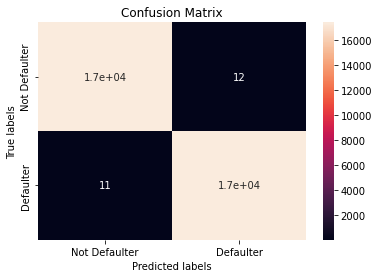

In [135]:
# Plot confusion matrix
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cnf_matrix_rf, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Feature Importance**

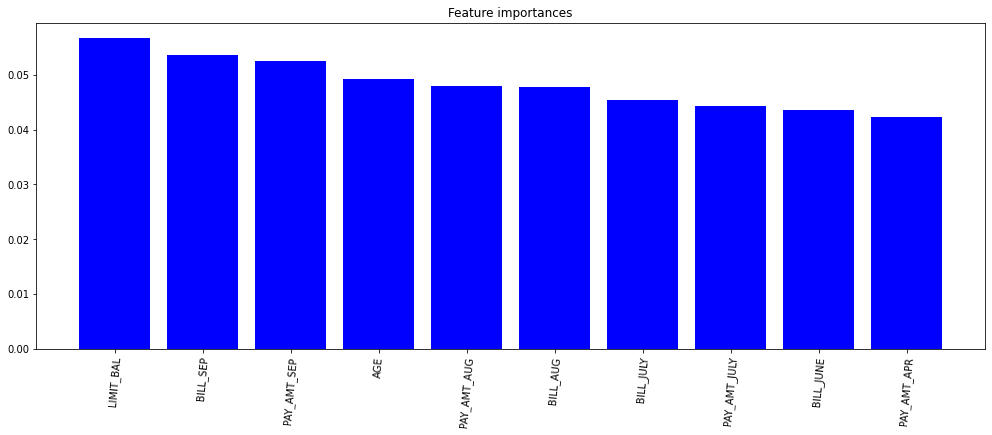

In [136]:
# Store the values of feature in dataframe and plot the graph for top 10 feature importance
feature_importance_rf = pd.DataFrame(optimal_rf_result.feature_importances_,index = columns,columns=['importance_rf']).sort_values('importance_rf',ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importance_rf.index, feature_importance_rf['importance_rf'],
        color="b",  align="center")
plt.xticks(feature_importance_rf.index, rotation = 85)
plt.show()

**Conclusion ⛓ ✅ ✈** From the above feature importance graph, we can say that the most important feature that make an impact on dependt variable are LIMIT_BAL and PAY_SEP.

### **ROC AUC Curve**

In [137]:
# Get the predicted class
train_class_pred = optimal_rf_result.predict(X_train)
test_class_pred = optimal_rf_result.predict(X_test)
#Assign the variable
y_pred_proba_rf = optimal_rf_result.predict_proba(X_test)[::,1]

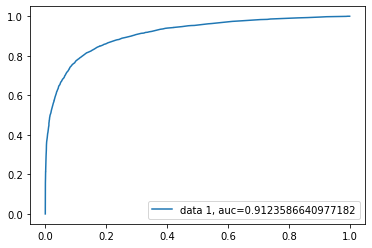

In [138]:
# Plot the curve
y_pred_proba = y_pred_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Support Vector Classifier(SVC) Implementation**


The Linear Support Vector Classifier (SVC) method applies a linear kernel function to perform classification and it performs well with a large number of samples. If we compare it with the SVC model, the Linear SVC has additional parameters such as penalty normalization which applies 'L1' or 'L2' and loss function.


In [139]:
# Create the copy of dataset
credit_df_svc = credit_df_copy.copy()

In [140]:
# Create the parameters
param_grid_svc = {'C':[5],'kernel':['rbf']} 

### **Train-Test split**

In [141]:
#define the X and y value
X = credit_df_logistic.drop(['default_payment_next_month','total_pay_value','amt_due'],axis=1)
y = credit_df_logistic['default_payment_next_month']

In [142]:
# Standardise the dataset
scaler_svc = StandardScaler()
X = scaler_svc.fit_transform(X)

In [143]:
# Split the dataset
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify= y)

### **GridSearchCV**

In [144]:
# Set the parameter and fit the model
grid_svc_clf = GridSearchCV(SVC(probability=True),param_grid_svc,scoring='accuracy',n_jobs= -1, verbose = 3, cv= 2)
grid_svc_clf.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


GridSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [5], 'kernel': ['rbf']}, scoring='accuracy',
             verbose=3)

In [145]:
# Get the best parameters
grid_svc_clf.best_params_

{'C': 5, 'kernel': 'rbf'}

In [146]:
# Get the best score
grid_svc_clf.best_score_

0.773719274063864

In [147]:
# Get the best estimator
optimal_svc_result = grid_svc_clf.best_estimator_
optimal_svc_result

SVC(C=5, probability=True)

In [148]:
# Get the predicted class
train_class_pred_svc = optimal_svc_result.predict(X_train)
test_class_pred_svc = optimal_svc_result.predict(X_test)

### **Model Evaluation**

In [149]:
# Get the accuracy score
train_accuracy_svc = accuracy_score(train_class_pred_svc,y_train)
test_accuracy_svc = accuracy_score(test_class_pred_svc,y_test)

print('The accuracy on train data is ', train_accuracy_svc)
print('The accuracy on train data is ', test_accuracy_svc)

The accuracy on train data is  0.7999081093498737
The accuracy on train data is  0.7742935906271536


In [150]:
# # Get the accuracy, precision, recall, f1score, roc_score
test_accuracy_svc = accuracy_score(test_class_pred_svc,y_test)
test_precision_svc = precision_score(test_class_pred_svc,y_test)
test_recall_svc = recall_score(test_class_pred_svc,y_test)
test_f1_svc = f1_score(test_class_pred_svc,y_test)
test_roc_svc = roc_auc_score(test_class_pred_svc,y_test)

print('The accuracy score on test data is ', test_accuracy_svc)
print('The precision score on test data is ', test_precision_svc)
print('The recall on test data is', test_recall_svc)
print("The f1 score on test data is ", test_f1_svc)
print('The roc score on tes data is ', test_roc_svc)

The accuracy score on test data is  0.7742935906271536
The precision score on test data is  0.7070985527222605
The recall on test data is 0.8168789808917197
The f1 score on test data is  0.7580347247875877
The roc score on tes data is  0.7793386398990798


**Conclusion ⛓ ✅ ✈** We can see from the above obtained results that there are around 74% train accuracy and 75% test accuracy which is not bad, but f1- score is 74% approx, so there may be some possibility of improvement.

**Confusion Matrix**

[[15052  2360]
 [ 4608 12804]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

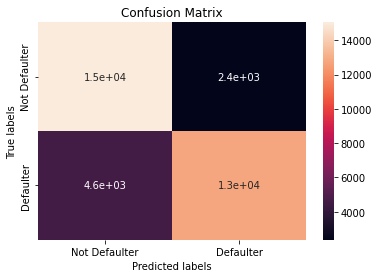

In [151]:
# Get the confusion matrix for train and test data
labels = ['Not Defaulter', 'Defaulter']
cnf_matrix_svc = confusion_matrix(y_train, train_class_pred_svc)
print(cnf_matrix_svc)

ax= plt.subplot()
sns.heatmap(cnf_matrix_svc, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **ROC AUC Curve**

In [152]:
# Get the predicted class
train_class_pred_svc = optimal_svc_result.predict(X_train)
test_class_pred_svc = optimal_svc_result.predict(X_test)

In [153]:
# Create the variable
y_pred_proba_svc = optimal_svc_result.predict_proba(X_test)[::,1]

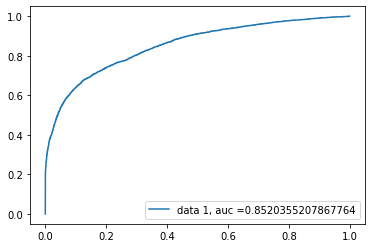

In [154]:
# Plot the curve
fpr,tpr, _ = roc_curve(y_test,y_pred_proba_svc)
auc = roc_auc_score(y_test, y_pred_proba_svc)
plt.plot(fpr,tpr,label='data 1, auc ='+str(auc))
plt.legend(loc=4)
plt.show()

# **Evaluating all the models**

In [155]:
recall_score

<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [156]:
# Create a table for comparison of all the scores from all the models
classifiers = ['Logistic Regression', 'Xgboost CLF', 'Random Forest CLF', 'Support Vector CLF']
overall_train_accuracy = [train_accuracy_logistic, train_accuracy_xgb_tuned, train_accuracy_rf_tuned, train_accuracy_svc]
overall_test_accuracy = [test_accuracy_logistic, test_accuracy_xgb_tuned, test_accuracy_rf_tuned, test_accuracy_svc ]
overall_precision_score = [test_precision_logistic, test_precision_xgb_tuned, test_precision_rf_tuned, test_precision_svc]
overall_recall_score = [test_recall_logistic, test_recall_xgb_tuned, test_recall_rf_tuned, test_recall_svc]
overall_f1_score = [test_f1_logistic, test_f1_xgb_tuned, test_f1_rf_tuned, test_f1_svc]

In [157]:
# Create a data frame for comparison of all the evaluation of metrics
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy':overall_train_accuracy, 'Test Accuracy':overall_test_accuracy, 'Precision Score':overall_precision_score, 'Recall Score':overall_recall_score, 'F1 Score':overall_f1_score})

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.753790,0.748880,0.680565,0.788266,0.730467
1,Xgboost CLF,0.909890,0.829428,0.786699,0.860211,0.821814
2,Random Forest CLF,0.999340,0.838646,0.802205,0.865267,0.832544
3,Support Vector CLF,0.799908,0.774294,0.707099,0.816879,0.758035


**Conclusion ⛓ ✅ ✈** On the basis of above Data Frame, we can say that RandomForestClassifier perform best among all of the four classifier models mentioned above.

### **Plotting ROC AUC for all the models**

In [158]:
# Create a variable for auc curve of all the models applied
classifiers_proba = [(optimized_clf_result,y_pred_proba_logistic),(optimal_rf_result,y_pred_proba_rf),(optimal_xgb_result,y_pred_proba_xgb),(optimal_svc_result,y_pred_proba_svc)]

# Create a dataframe of result table variable
result_table = pd.DataFrame(columns=['Classifiers', 'fpr', 'tpr', 'auc'])

# Train the model and record the result
for pair in classifiers_proba:
  fpr, tpr, _ = roc_curve(y_test, pair[1])
  auc = roc_auc_score(y_test, pair[1])
  result_table = result_table.append({'Classifiers':pair[0].__class__.__name__,'fpr':fpr,'tpr':tpr,'auc':auc},ignore_index = True)

# Set the name of the classifiers as index table
result_table.set_index('Classifiers', inplace = True) 

In [159]:
# Check the result table
result_table

,fpr,tpr,auc
Classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.00017229496898690558, 0.0001...","[0.0, 0.00017229496898690558, 0.09062715368711...",0.823602
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001722949689...","[0.0, 0.03428669882839421, 0.06133700895933838...",0.912359
XGBClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00017229496898690558, 0.00155065472088...",0.908464
SVC,"[0.0, 0.0, 0.0, 0.00017229496898690558, 0.0001...","[0.0, 0.00017229496898690558, 0.18728463128876...",0.852036


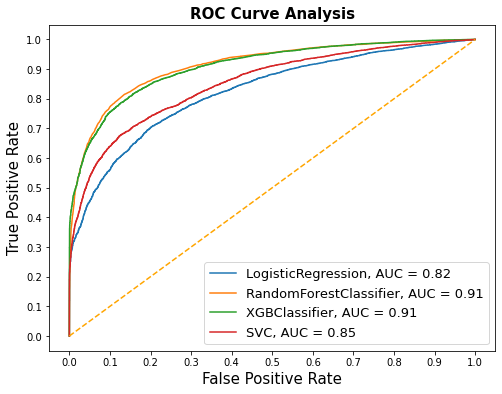

In [160]:
# Plot the auc curve of all the models for comparison
fig = plt.figure(figsize = (8,6))

for i in result_table.index:
  plt.plot(result_table.loc[i]['fpr'],result_table.loc[i]['tpr'],label="{}, AUC = {:.2f}".format(i,result_table.loc[i]['auc']))

plt.plot([0,1],[0,1],color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize = 15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize = 15)
plt.legend(prop = {'size':13}, loc = 'lower right')
plt.show()

### **Model Recommendation**


We recommend recall = 0.8, however, the threshold can be adjusted to reach higher recall.

In [161]:
# Compute precision, recall and threshold of Random Forest
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
# Recommend recall score of 0.8
recall_80 = recalls[np.argmin(recalls >=0.8)]
precision_80 = precisions[np.argmin(recalls >=0.8)]
threshold_80_recall = thresholds[np.argmin(recalls >=0.8)]
thresholds = np.append(thresholds, 1)
recall_80, precision_80, threshold_80_recall

(0.7999655410062027, 0.8667164457718872, 0.508)

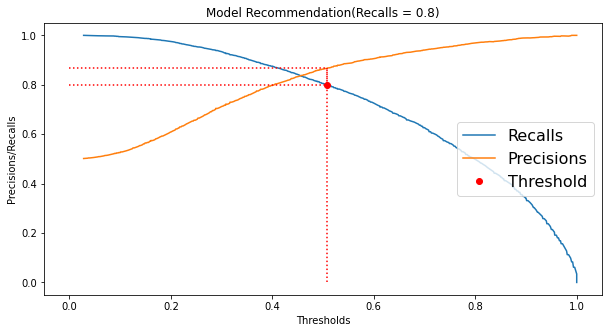

In [162]:
# Plot the chart for model recommendation recall = 0.8
fig, ax= plt.subplots(figsize=(10,5))
ax.plot(thresholds, recalls, label='Recalls')
ax.plot(thresholds, precisions, label='Precisions')

ax.plot([threshold_80_recall, threshold_80_recall], [precision_80, recall_80], "r:")
ax.plot([threshold_80_recall, threshold_80_recall], [0, precision_80], "r:")
ax.plot([0, threshold_80_recall], [precision_80, precision_80], "r:")
ax.plot([0, threshold_80_recall], [recall_80, recall_80], "r:")
ax.plot([threshold_80_recall],[recall_80], "ro", label = "Threshold")

ax.set_xlabel('Thresholds')
ax.set_ylabel('Precisions/Recalls')
ax.legend(loc = 'center right', fontsize = 16)
plt.title('Model Recommendation(Recalls = 0.8)')
plt.savefig('recommend recall')
plt.show()

### **Feature Importance for Recommended model**

Text(0.5, 1.0, 'Feature Importance')

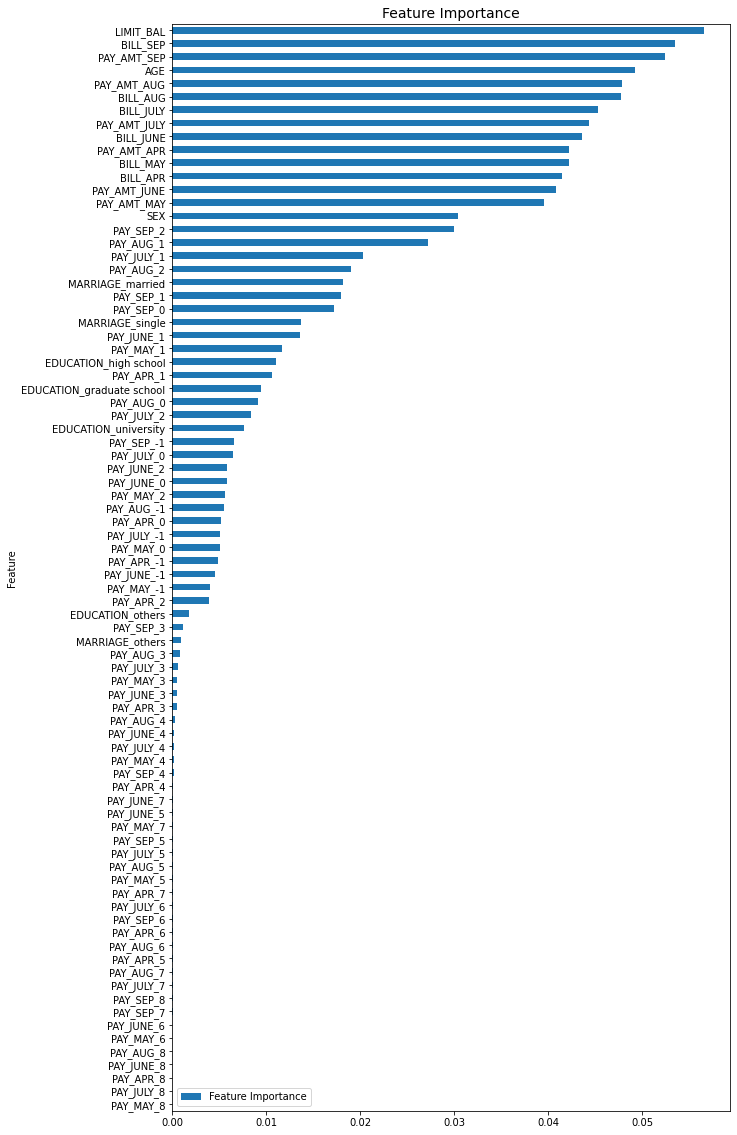

In [163]:
# Plot the feature importances of recommended model
feature_df = pd.DataFrame({'Feature': columns, 'Feature Importance': optimal_rf_result.feature_importances_})
feature_df = feature_df.sort_values(by='Feature Importance')

figure, ax = plt.subplots(figsize = (10,20))
feature_df.plot.barh(x='Feature', y='Feature Importance', ax=ax)
plt.title('Feature Importance', fontsize = 14)

**Conclusion ⛓ ✅ ✈** "LIMT_BAL" , "BILL_SEP" and "PAY_AMT_SEP" are the most recent 2 months payment status and they are the strongest predictors of future payment default risk.

# **Ultimate Conclusion ⏸ ➿ ✅ ✌**


RandomForest model and XGBoost model both has same recall, so if the business cares recall the most than both of this model are best candidate. If the balance of recall and precision is most important metric than RandomForest is 
the ideal model. RandomForest has recall and precision both higher than the other model applied. Hence, I would recommend RandomForest for this dataset.
*   Data categorical variables had minority classes which were added to their closest majority class.
*   There were not huge gap but female clients tended to default the most.
*   Labels of the data were imbalanced and had a significant difference.
*   Gradient boost gave the highest accuracy of 82% on test dataset.
*   Repayment in the month of september tended to be the most important feature for our machine learning model.
*   The best accuracy is obtained for the Random forest and XGBoost classifier.
*   In general, all models have comparable accuracy. Nevertheless, because the classes are imbalanced (the proportion of non-default credit cards is higher than default) this metric is misleading. Also, accuracy does not consider the rate of false positives (non-default credits cards that were predicted as default) and false negatives (default credit cards that were incorrectly predicted as non-default). Both cases have negative impact on the bank, since false positives leads to unsatisfied customers and false negatives leads to financial loss.
*   From above table we can see that XGBoost Classifier having Recall = 86%, F1-score = 82%, and ROC Score = 83% and Random forest Classifier having Recall =86%, F1-score = 83% and ROC Score = 84%.
*   XGBoost Classifier and RandomForest Classifier are giving us the best Recall, F1-score, and ROC Score among other algorithms. We can conclude that these two algorithms are the best to predict whether the credit card is default or not default according to our analysis on this dataset.